<a href="https://colab.research.google.com/github/gabriellysilva-git/Bootcamp_WomakersCode/blob/main/Desafio_Teste_de_Hipoteses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Considerando a base de dados experimento_test_ab.csv responda as questões abaixo: 1. Qual dos cenários tem a maior taxa de conversão?

In [16]:
import pandas as pd

# Carregar os dados
dados_ab = pd.read_csv('experimento_teste_ab.csv')

# Calcular taxa de conversão para cada cenário
taxa_conversao = dados_ab.groupby('Versão_Página')['Conversões'].mean()

# Encontrar o cenário com maior taxa
maior_taxa = taxa_conversao.idxmax()
valor_maior_taxa = taxa_conversao.max()

print(f"O cenário com maior taxa de conversão é {maior_taxa} com {valor_maior_taxa:.2%}")

O cenário com maior taxa de conversão é B com 12.50%


2. Calcule qual o tamanho da amostra necessária para o desenvolvimento de umtesteA/B, seguindo os seguintes critérios:
a. O cenário A, da base, como o inicial, que funciona hoje.
b. Considere 95% de confiança de queoefeito na conversão não foi aleatório com um nível de significância de 5% (alpha = 0,05).
c. Também considere 80% de certeza conseguir capturar o efeito da nova abordagem.
d. O aumento para 10% de conversão.

In [3]:
import statsmodels.stats.power as smp

# Parâmetros
alpha = 0.05  # Nível de significância
power = 0.8   # Poder estatístico
effect_size = 0.1  # Aumento de 10% na conversão
conversao_A = dados_ab[dados_ab['Versão_Página'] == 'A']['Conversões'].mean()

# Calcular tamanho da amostra
tamanho_amostra = smp.tt_ind_solve_power(
    effect_size=effect_size,
    alpha=alpha,
    power=power,
    ratio=1.0
)

print(f"Tamanho da amostra necessário: {int(tamanho_amostra)} por grupo")

Tamanho da amostra necessário: 1570 por grupo


Verifique a base pacientes.csv, os dados são fictícios. A sintetiza uma base de dados de um hospital que trata de pacientes com problemas cardíacos. Considere a base como a população, portanto as estatísticas da população são conhecidas. Responda as perguntas abaixo:

3. Considerando uma amostra de 45 números que representam o index do dataframe, índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]). Considerando essa amostra é possível dizer que a idade média das pessoas com problemas cardíacos é maior que 50 anos? Nível de significância igual a 5%.

In [4]:
from scipy import stats

# Carregar os dados
dados_pacientes = pd.read_csv('pacientes.csv')

# Índices da amostra
indices = [909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]

# Filtrar a amostra
amostra = dados_pacientes.loc[indices, 'Idade']

# Teste t unilateral
t_stat, p_valor = stats.ttest_1samp(amostra, 50, alternative='greater')

print(f"Idade média da amostra: {amostra.mean():.2f}")
print(f"p-valor: {p_valor:.4f}")

if p_valor < 0.05:
    print("Rejeitamos H0: A idade média é maior que 50 anos.")
else:
    print("Não rejeitamos H0: Não há evidências de que a idade média seja maior que 50 anos.")

Idade média da amostra: 50.09
p-valor: 0.4793
Não rejeitamos H0: Não há evidências de que a idade média seja maior que 50 anos.


4. Queremos entender que tipo de amostra estamos lidando se dividirmos os conjuntos em 2, sendo um com pessoas que têm condições de saúde adicionais e o outro com pessoas saudáveis. Seria dependente ou independente?

In [5]:
# Dividir os dados em dois grupos
grupo_saudavel = dados_pacientes[dados_pacientes['Estado_Saude'] == 0]
grupo_condicoes = dados_pacientes[dados_pacientes['Estado_Saude'] == 1]

print("Tamanho do grupo saudável:", len(grupo_saudavel))
print("Tamanho do grupo com condições:", len(grupo_condicoes))

if len(grupo_saudavel) == len(grupo_condicoes):
    print("Amostras pareadas (dependentes)")
else:
    print("Amostras independentes")

Tamanho do grupo saudável: 490
Tamanho do grupo com condições: 510
Amostras independentes


5. Agora considere o um conjunto de pessoas aleatória que representam o index do dataframe, índices = ([690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966, 943, 372]), podemos dizer que a pressão arterial média para pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde? Considere o nível de significância a 6%.

In [6]:
# Índices da amostra
indices = [690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966, 943, 372]

# Filtrar a amostra
amostra = dados_pacientes.loc[indices]

# Dividir em grupos
pressao_saudavel = amostra[amostra['Estado_Saude'] == 0]['Pressao_Arterial']
pressao_condicoes = amostra[amostra['Estado_Saude'] == 1]['Pressao_Arterial']

# Teste t independente
t_stat, p_valor = stats.ttest_ind(pressao_saudavel, pressao_condicoes)

print(f"p-valor: {p_valor:.4f}")

if p_valor < 0.06:
    print("Rejeitamos H0: As pressões arteriais médias são diferentes.")
else:
    print("Não rejeitamos H0: Não há evidências de diferença nas pressões arteriais médias.")

p-valor: 0.9359
Não rejeitamos H0: Não há evidências de diferença nas pressões arteriais médias.


6. Existe uma diferença significativa na pressão arterial média entre diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%) a. Hipótese Nula (H0 ): A pressão arterial média é a mesma em todos os grupos étnicos. b. Hipótese Alternativa (H1 ): Há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.

In [7]:
from scipy.stats import f_oneway

# Separar por etnia
grupos = []
for etnia in dados_pacientes['Etnia'].unique():
    grupos.append(dados_pacientes[dados_pacientes['Etnia'] == etnia]['Pressao_Arterial'])

# Teste ANOVA
f_stat, p_valor = f_oneway(*grupos)

print(f"p-valor: {p_valor:.4f}")

if p_valor < 0.05:
    print("Rejeitamos H0: Há diferença significativa entre pelo menos dois grupos étnicos.")
else:
    print("Não rejeitamos H0: Não há diferença significativa entre os grupos étnicos.")

p-valor: 0.8738
Não rejeitamos H0: Não há diferença significativa entre os grupos étnicos.


7. Lúcia é uma pesquisadora e tem o objetivo de entender a relação de gênero neste grupo de pacientes. Acredita-se que há uma relação entre o sexo e condições de saúde adicionais. (Teste qui-quadrado)

In [8]:
from scipy.stats import chi2_contingency

# Tabela de contingência
tabela = pd.crosstab(dados_pacientes['Genero'], dados_pacientes['Estado_Saude'])

# Teste qui-quadrado
chi2, p_valor, _, _ = chi2_contingency(tabela)

print(f"p-valor: {p_valor:.4f}")

if p_valor < 0.05:
    print("Rejeitamos H0: Há relação entre gênero e condições de saúde.")
else:
    print("Não rejeitamos H0: Não há relação entre gênero e condições de saúde.")

p-valor: 1.0000
Não rejeitamos H0: Não há relação entre gênero e condições de saúde.


8. Existe uma associação entre a idade dos pacientes e sua pressão arterial? a. Hipótese Nula (H0 ): se a pressão arterial é independente da idade b. Hipótese Alternativa (H1 ): a pressão arterial esta associada a idade

Coeficiente de correlação: -0.0214
p-valor: 0.4994
Não rejeitamos H0: Não há associação entre idade e pressão arterial.


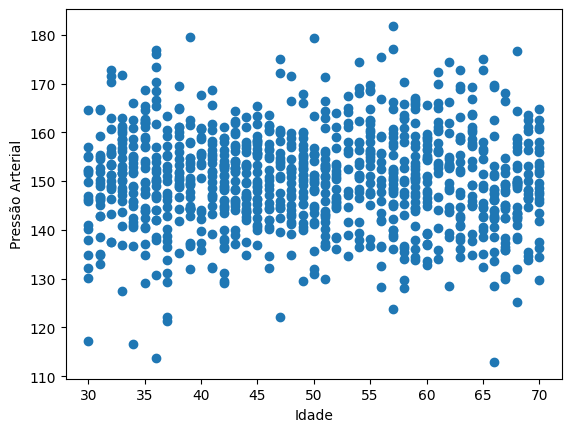

In [13]:
from scipy.stats import pearsonr

# Teste de correlação
corr, p_valor = pearsonr(dados_pacientes['Idade'], dados_pacientes['Pressao_Arterial'])

print(f"Coeficiente de correlação: {corr:.4f}")
print(f"p-valor: {p_valor:.4f}")

if p_valor < 0.05:
    print("Rejeitamos H0: Há associação entre idade e pressão arterial.")
else:
    print("Não rejeitamos H0: Não há associação entre idade e pressão arterial.")

import matplotlib.pyplot as plt

plt.scatter(dados_pacientes['Idade'], dados_pacientes['Pressao_Arterial'])
plt.xlabel("Idade")
plt.ylabel("Pressão Arterial")
plt.show()

9. Qual é o intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais? (nível de confiança 95%)

In [10]:
import numpy as np

# Filtrar pacientes com condições
pressao_condicoes = dados_pacientes[dados_pacientes['Estado_Saude'] == 1]['Pressao_Arterial']

# Calcular intervalo de confiança
media = pressao_condicoes.mean()
desvio_padrao = pressao_condicoes.std()
n = len(pressao_condicoes)
erro_padrao = desvio_padrao / np.sqrt(n)
intervalo = stats.norm.interval(0.95, loc=media, scale=erro_padrao)

print(f"Intervalo de confiança (95%): ({intervalo[0]:.2f}, {intervalo[1]:.2f})")

Intervalo de confiança (95%): (149.22, 151.02)


10. A distribuição da pressão arterial na população segue uma distribuição normal?
a. Hipótese Nula (H0 ): A distribuição da pressão arterial na população segue uma distribuição normal.
b. Hipótese Alternativa (H1 ): A distribuição da pressão arterial na população não segue uma distribuição normal.

In [11]:
from scipy.stats import shapiro

# Teste de normalidade
stat, p_valor = shapiro(dados_pacientes['Pressao_Arterial'])

print(f"p-valor: {p_valor:.4f}")

if p_valor < 0.05:
    print("Rejeitamos H0: A distribuição não é normal.")
else:
    print("Não rejeitamos H0: A distribuição é normal.")

p-valor: 0.0607
Não rejeitamos H0: A distribuição é normal.
